## compare patient age distribution to population distribution

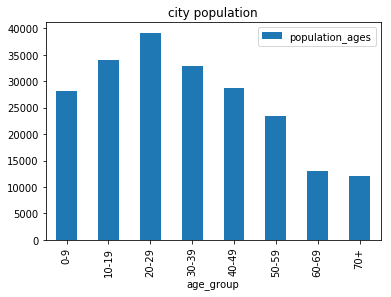

In [11]:
# total population of the city
# data from https://www.citypopulation.de/php/brazil-espiritosanto.php?cityid=320530905
data = [   
    ('0-9', 28179),
    ('10-19', 34054),
    ('20-29', 39172),
    ('30-39', 32798),
    ('40-49', 28781),
    ('50-59', 23451),
    ('60-69', 13058),
    ('70+', 12036)
]
population = pd.DataFrame(data=data, columns=['age_group','population_ages'])
population = population.set_index('age_group')
population.plot.bar(title='city population')


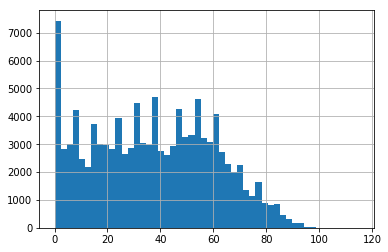

In [12]:
appointments['age'].hist(bins=50) 

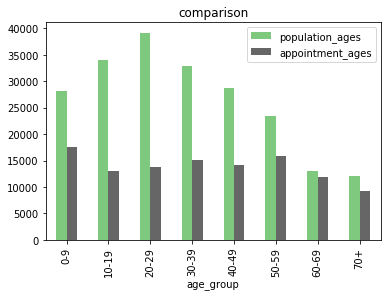

In [13]:
# cluster sample ages by the same age group intervals
# do not make this unique patients
labels = []
for entry in data:
    labels.append(entry[0])
    
appointment_ages = appointments['age'].groupby(
    pd.cut(appointments['age'],
           [0,10,20,30,40,50,60,70,120],
           labels=labels,
           right=False)
).count()

appointment_ages = appointment_ages.rename('appointment_ages').to_frame()

population = population.merge(appointment_ages,left_index=True,right_index=True)

population.plot.bar(title='comparison',colormap='Accent')

In [14]:
# calculate the percentages for each age group
population['percentage'] = population['appointment_ages'] / population['population_ages']
population

,population_ages,appointment_ages,percentage
age_group,,,
0-9,28179,17475,0.620143
10-19,34054,12936,0.379867
20-29,39172,13699,0.349714
30-39,32798,15171,0.462559
40-49,28781,14209,0.493694
50-59,23451,15863,0.676432
60-69,13058,11876,0.909481
70+,12036,9297,0.772433


In [15]:

# only keep the first patient id in the dataset
# so that you don't so that you don't double count people
patients = appointments.drop_duplicates(subset='patient_id')
patients.shape

(62298, 16)